<a href="https://colab.research.google.com/github/Maheshbachanaboina/Customer_behaviour/blob/main/Another_copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def load_data(path):
    df = pd.read_csv('/content/customer_shopping_behavior.csv')
    return df

def clean_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Handle missing values
    df = df.dropna()

    # Convert date columns if exist
    if 'purchase_date' in df.columns:
        df['purchase_date'] = pd.to_datetime(df['purchase_date'])

    return df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/customer_shopping_behavior.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


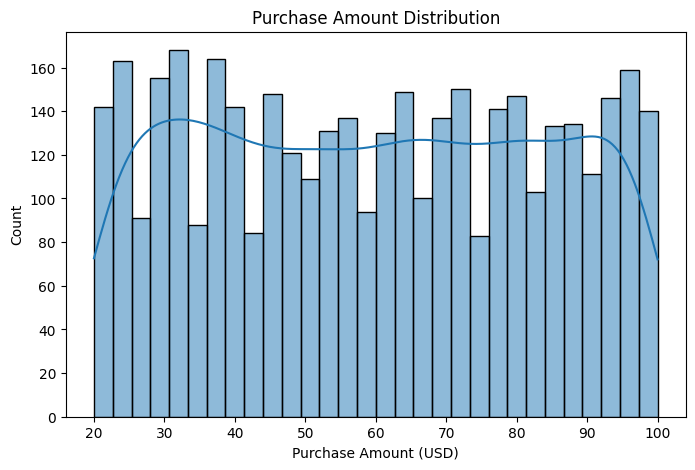

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True)
plt.title("Purchase Amount Distribution")
plt.show()

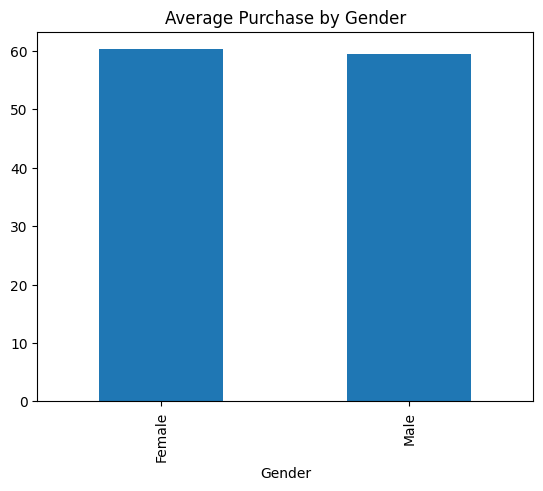

In [ ]:
df.groupby("Gender")["Purchase Amount (USD)"].mean().plot(kind="bar")
plt.title("Average Purchase by Gender")
plt.show()

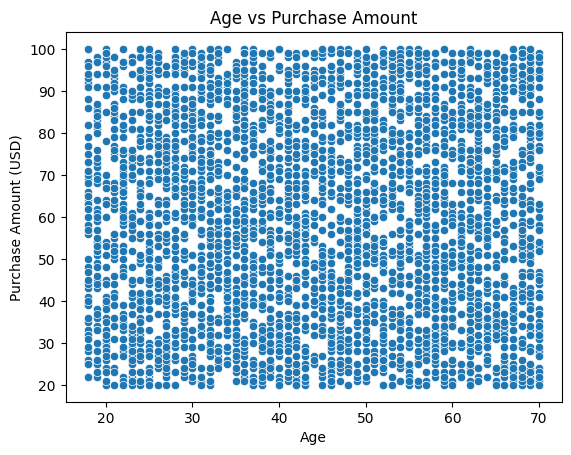

In [ ]:
sns.scatterplot(x="Age", y="Purchase Amount (USD)", data=df)
plt.title("Age vs Purchase Amount")
plt.show()

In [ ]:
# Create age groups
df['age_group'] = pd.cut(df['Age'],
                         bins=[18,25,35,50,65],
                         labels=['18-25','26-35','36-50','50+'])

# Customer total spending
customer_total = df.groupby("Customer ID")["Purchase Amount (USD)"].sum()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def customer_segmentation(df):

    features = df[['Age', 'Purchase Amount (USD)']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(scaled_features)

    return df

# Call the function to apply segmentation and add the 'cluster' column
df = customer_segmentation(df)

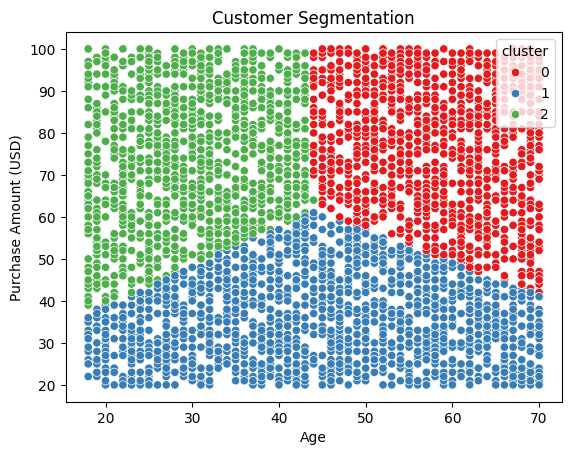

In [ ]:
sns.scatterplot(x='Age',
                y='Purchase Amount (USD)',
                hue='cluster',
                data=df,
                palette='Set1')
plt.title("Customer Segmentation")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df[['Age']]
y = df['Purchase Amount (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))

MAE: 20.805098266424075


In [ ]:
!pip install streamlit
import streamlit as st
import pandas as pd

df = pd.read_csv("/content/customer_shopping_behavior.csv")

st.title("Customer Shopping Dashboard")

st.metric("Total Revenue", f"${df['Purchase Amount (USD)'].sum():,.2f}")

st.bar_chart(df.groupby("Gender")["Purchase Amount (USD)"].mean())

2026-02-27 15:11:20.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 15:11:20.726 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 15:11:20.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 15:11:20.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 15:11:20.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 15:11:20.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 15:11:20.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 15:11:20.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# pandas
# numpy
# matplotlib
# seaborn
# scikit-learn
# streamlit